In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import data_preprocess as dp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [12]:
data = pd.read_csv('./data/D2.csv')

In [13]:
df = dp.data_prep(data, verbose=True)

Running drop_columns_with_missing_values...
Running recode_medical_specialty...
Running recode_admission_type...
Running recode_discharge_disposition...
Running recode_admission_source...
Running recode_binary_values...
Running recode_drug_columns...
Running recode_age_column...
Running drop_deceased_patients...
Data preparation complete.


In [14]:
df.head()

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,AfricanAmerican,1,8,1,Other,33,0,14,0,1,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Emergency
1,Caucasian,1,7,3,Other,48,2,7,0,0,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Transfer
2,Caucasian,1,5,3,Surgical,25,1,15,0,0,...,0,0,0,1,0,1,0,Elective,Home,Referral
3,AfricanAmerican,1,5,6,Other,41,0,19,0,0,...,0,0,0,1,0,1,1,Emergency,Home,Emergency
4,AfricanAmerican,0,8,4,Other,22,0,12,0,0,...,0,0,0,1,0,1,1,Emergency,AdditonalCare,Emergency


In [15]:
rs = 1

In [16]:
X = df.drop('readmitted', axis=1)

In [17]:
y = df['readmitted']

In [18]:
# Identifying categorical columns that need encoding
categorical_columns = ['race', 'medical_specialty', 'admission_type', 'discharge_disposition', 'admission_source']
numerical_columns = ['gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
                     'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'insulin', 'change', 'diabetesMed']

In [19]:
label_encoder = LabelEncoder()
X['age'] = label_encoder.fit_transform(X['age'])

In [20]:
X = pd.get_dummies(X, columns=categorical_columns, dtype=int)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
mlp_model = MLPClassifier(random_state=rs, max_iter=700)
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=700, random_state=1)

In [25]:
y_pred = mlp_model.predict(X_test)

In [26]:
print(f"Train accuracy: {mlp_model.score(X_train, y_train)}")
print(f"Test accuracy: {mlp_model.score(X_test, y_test)}")

Train accuracy: 0.6984883130081301
Test accuracy: 0.6013719512195121


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      2051
           1       0.60      0.51      0.55      1885

    accuracy                           0.60      3936
   macro avg       0.60      0.60      0.60      3936
weighted avg       0.60      0.60      0.60      3936



In [62]:
# Hyperparameter tuning
param_range_1 = range(5, 66, 15)
params = {'hidden_layer_sizes': [(x,) for x in param_range_1]}

In [63]:
grid_search = GridSearchCV(mlp_model, cv=10, n_jobs=-1, param_grid=params, return_train_score=True)

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=1),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (20,), (35,), (50,),
                                                (65,)]},
             return_train_score=True)

In [31]:
results = grid_search.cv_results_

In [32]:
results_df = pd.DataFrame(results)

In [33]:
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,6.158338,0.973691,0.006664,0.003483,"(5,)","{'hidden_layer_sizes': (5,)}",0.627937,0.619683,0.625397,0.598095,...,0.640342,0.640483,0.634862,0.642837,0.635709,0.634862,0.640790,0.638038,0.638543,0.002701
1,13.035744,2.721583,0.008645,0.008755,"(25,)","{'hidden_layer_sizes': (25,)}",0.626032,0.618413,0.643175,0.612063,...,0.660174,0.661938,0.657939,0.663726,0.668878,0.663938,0.663373,0.664432,0.663307,0.003586
2,25.266180,8.212139,0.012122,0.010725,"(45,)","{'hidden_layer_sizes': (45,)}",0.615873,0.611429,0.615238,0.601905,...,0.673654,0.682829,0.678617,0.682639,0.677205,0.682851,0.674735,0.664008,0.677366,0.005746
3,28.723829,5.235086,0.008344,0.003781,"(65,)","{'hidden_layer_sizes': (65,)}",0.612063,0.590476,0.636825,0.617778,...,0.689816,0.682264,0.683698,0.694072,0.698165,0.695554,0.685039,0.692096,0.691389,0.006225
4,25.266882,3.088153,0.003219,0.001198,"(85,)","{'hidden_layer_sizes': (85,)}",0.610794,0.600635,0.608254,0.591111,...,0.707531,0.708871,0.699506,0.709174,0.693366,0.706210,0.699224,0.700635,0.702751,0.004823


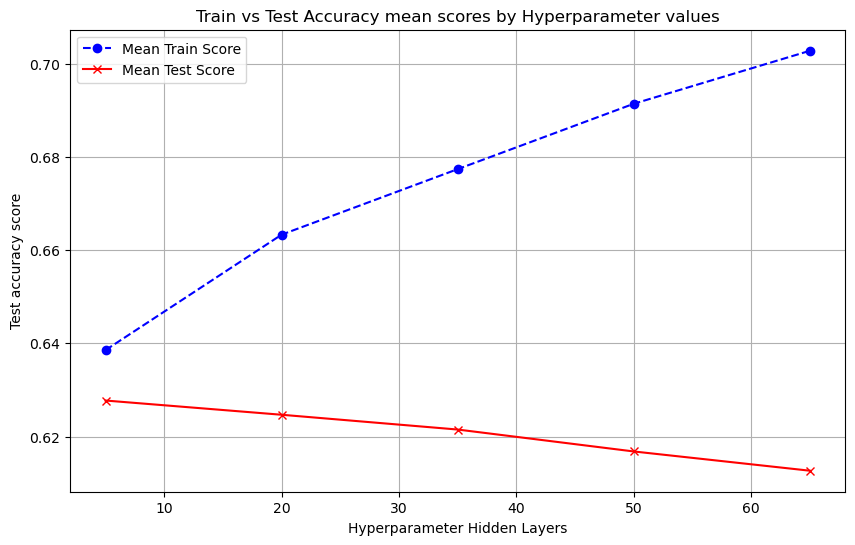

In [68]:
train_result = results_df['mean_train_score']
test_result = results_df['mean_test_score']
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_range_1, train_result, label='Mean Train Score', marker='o', linestyle='--', color='b')
plt.plot(param_range_1, test_result, label='Mean Test Score', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Hyperparameter Hidden Layers')
plt.ylabel('Test accuracy score')
plt.title('Train vs Test Accuracy mean scores by Hyperparameter values')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
param_range_2 = range(1, 6, 1)
new_params = {'hidden_layer_sizes': [(x,) for x in param_range_2]}

In [70]:
grid_search2 = GridSearchCV(mlp_model, cv=10, n_jobs=-1, param_grid=new_params, return_train_score=True)

In [71]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=1),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,)]},
             return_train_score=True)

In [72]:
grid_search2.best_params_

{'hidden_layer_sizes': (2,)}

In [73]:
results2 = grid_search2.cv_results_

In [74]:
results_df2 = pd.DataFrame(results2)

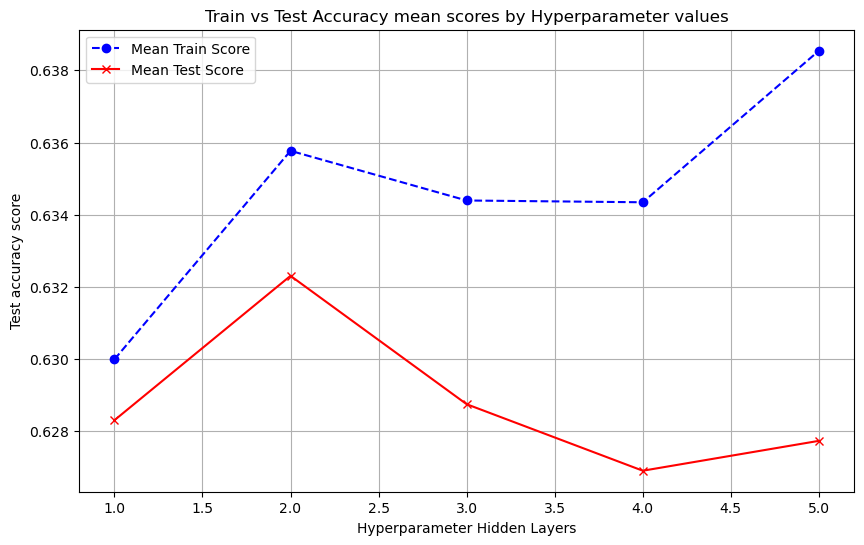

In [75]:
train_result = results_df2['mean_train_score']
test_result = results_df2['mean_test_score']
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_range_2, train_result, label='Mean Train Score', marker='o', linestyle='--', color='b')
plt.plot(param_range_2, test_result, label='Mean Test Score', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Hyperparameter Hidden Layers')
plt.ylabel('Test accuracy score')
plt.title('Train vs Test Accuracy mean scores by Hyperparameter values')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
print(f"Train accuracy: {grid_search2.score(X_train, y_train)}")
print(f"Test accuracy: {grid_search2.score(X_test, y_test)}")

y_pred = grid_search2.predict(X_test)
print(classification_report(y_test, y_pred))



Train accuracy: 0.6359883130081301
Test accuracy: 0.6298272357723578
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      2051
           1       0.64      0.52      0.58      1885

    accuracy                           0.63      3936
   macro avg       0.63      0.63      0.62      3936
weighted avg       0.63      0.63      0.63      3936



In [77]:
# Recursively remove features
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression 

In [80]:
# Initialize the model
rfecv = RFECV(estimator=LogisticRegression(random_state=rs, max_iter=1000), step=1, cv=10, scoring='accuracy')

In [81]:
rfecv.fit(X_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(max_iter=1000, random_state=1),
      scoring='accuracy')

In [86]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [87]:
params_range_3 = range(1,4,1)
new_params_3 = {'hidden_layer_sizes': [(x,) for x in params_range_3], 'alpha': [0.001, 0.01, 0.1, 1, 10]}

In [88]:
grid_rfecv = GridSearchCV(mlp_model, cv=10, n_jobs=-1, param_grid=new_params_3, return_train_score=True)

In [89]:
grid_rfecv.fit(X_train_rfecv, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=700, random_state=1),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'hidden_layer_sizes': [(1,), (2,), (3,)]},
             return_train_score=True)

In [91]:
print(f"Train accuracy: {grid_rfecv.score(X_train_rfecv, y_train)}")
print(f"Test accuracy: {grid_rfecv.score(X_test_rfecv, y_test)}")

print(classification_report(y_test, grid_rfecv.predict(X_test_rfecv)))


Train accuracy: 0.6316056910569106
Test accuracy: 0.6277947154471545
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      2051
           1       0.65      0.49      0.56      1885

    accuracy                           0.63      3936
   macro avg       0.63      0.62      0.62      3936
weighted avg       0.63      0.63      0.62      3936

